# Klassifikationsverfahren
In diesem Jupyter Notebook werden die in der Vorlesung besprochenen Klassifikationsverfahren an Hand einiger (synthetischer) [Datensätze](https://github.com/MarkEich96/Maschinelles-Lernen-SoSe-2024) erprobt.

## Vorbereitung
Um schnelle Matrixmultiplikationen durchzuführen und die Daten aufzutragen, werden die Pakete `numpy` und `matplotlib` verwendet.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Lineare Separation
Im Datensatz `classification_data01.dat` sind Datenpunkt im zwei dimensionalen Raum $\mathbb{R}^2$ (um genauer zu sein aus der Menge $[0, 1]\times[0, 1]$) mit den Klassenlabels $y\in\{0, 1\}$ aufgetragen. 

__Aufgabe__: Lade die Daten und trage diese auf. Überzeuge Dich davon, dass sie linear separierbar sind. Kannst Du erahnen, wie groß der Versionsraum der konsistenten und vollständigen Hypothesen ist?

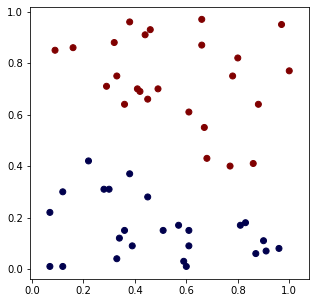

In [2]:
# Einlesen der Daten
x1, x2, y = np.loadtxt("classification_data01.dat", unpack = True)

# Anlegen eines Plots
plt.figure(figsize = (5, 5))

# Auftragen der Daten 
plt.scatter(x1, x2, c = y, cmap = 'seismic')

# Zurechtmachen der Achsen
plt.axis('equal')

plt.show()

Durch das Anlegen eines geraden Objekts am Bildschirm lässt sich grob einschätzen, dass die Steigung im Intervall $[-1, -0.05]$ und der y-Achsenabschnitt ungefähr im Bereich $[0.5, 0.9]$ liegt.

In der Vorlesung wurde besprochen, dass als Modell die Hypothese
$$
h_{\vec{w}}(\vec{x})=\mathrm{sig}(\vec{w}\cdot\vec{x}+w_0)=\frac{1}{1+\mathrm{exp}(-(\vec{w}\cdot\vec{x}+w_0))}
$$
verwendet werden kann und sich daraus das empirische Risiko
$$
\hat{R}=\frac{1}{N}\sum_{i=1}^N\mathrm{ln}(1+\mathrm{exp}((-1)^{y_i}(\underline{X}'\vec{w})_i))
$$
mit der erweiterten Datenmatrix
$$
\underline{X}'=\begin{pmatrix}
 1 & x_{11} & x_{12} & \cdots & x_{1d}\\
 1 & x_{21} & x_{22} & \cdots & x_{2d}\\
 \vdots & \vdots & \ddots & \vdots\\
 1 & x_{N1} & x_{N2} & \cdots & x_{Nd}
\end{pmatrix}
$$
ergibt. Der Gradient war durch 
$$
\frac{\partial \hat{R}}{\partial w_j}=\frac{1}{N}\sum_{i=1}^N\frac{(-1)^{y_i}\underline{X}'_{ij}}{1+\mathrm{exp}(-(-1)^{y_i}(\underline{X}'\vec{w})_i)}
$$
gegeben.

__Aufgabe__: Verwende das Gradientenabstiegsverfahren, um die Gewichte $\hat{\vec{w}}$ zu bestimmen. Bestimme aus diesen die Steigung und den y-Achsenabschnitt der Trenngeraden. Ermittle dann das empirische Riskio (also den Trainingsfehler). Trage die Ergebnisse mittels des Kontur-Plots im untenstehenden Code-Gerüst auf.

#### Gradientenabstiegsverfahren

In [3]:
# Aufbauen der erweiterten Datenmatrix
N = len(y)
d = 2
X = np.zeros(shape = (N, d+1))
for n in range(N):
    X[n] = np.array([1, x1[n], x2[n]])
    
# Errechnen des Vorzeichenvektors
z = (-1)**y
    
# Festlegen von Hyperparametern
learning_rate = 10**(-3)
epochen = 1000

# Initialisieren der Gewichte
w = np.array([1, 1, 1])

# Gradientenabstieg
for n in range(epochen):
    grad_vec = np.zeros(d+1)
    for j in range(d):
        grad_vec[j] = np.sum((z*X[:, j])/(1+np.exp(-z*(X@w))))
    w = w-learning_rate*grad_vec

In [4]:
print(f'Die Steigung liegt bei m = {-w[1]/w[2]:.2f}, während der y-Achsenabschnitt durch b = {-w[0]/w[2]:.2f} gegeben ist.')

Die Steigung liegt bei m = -0.59, während der y-Achsenabschnitt durch b = 0.74 gegeben ist.


#### Auftragen der Daten

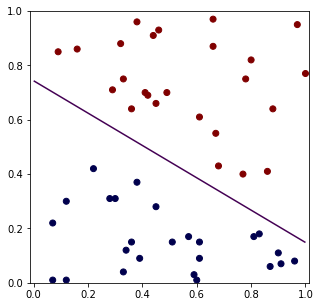

In [5]:
# Anlegen eines Plots
plt.figure(figsize = (5, 5))

# Auftragen der Daten 
plt.scatter(x1, x2, c = y, cmap = 'seismic')

# Erstellen eines Meshgrids für den Contour-Plot
X1, X2 = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))

# Erstellen eines Contour-Plots mit erfüllen der Gleichung bei Contour == 0
plt.contour(X1, X2, w[0]+w[1]*X1+w[2]*X2,  [0])

# Zurechtmachen der Achsen
plt.axis('equal')

plt.show()

#### Berechnen des Trainingsfehlers

In [6]:
# Implementieren der Formel für den Testfehler
R = np.sum(np.log(1+np.exp(z*(X@w))))/N
print(f'Der Testfehler ist durch {R:.4f} gegeben.')

Der Testfehler ist durch 0.5536 gegeben.


## Validierung
Im Datensatz `classification_data02.dat` ist ein Testdatensatz für das Modell hinterlegt.

__Aufgabe__: Lade den Testdatensatz und trage ihn zusammen mit dem Entscheidungsmodell auf. Ist die gefundene Hypothese mit dem Testdatensatz konsistent? Bestimme dann den Test- und daraus den Verallgemeinerungsfehler.

#### Auftragen des Validierungsdatensatzes

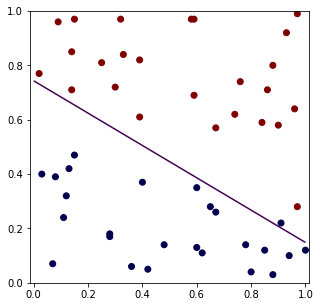

In [7]:
# Laden des Validierungsdatensatzes
x1_test, x2_test, y_test = np.loadtxt("classification_data02.dat", unpack = True)

# Anlegen eines Plots
plt.figure(figsize = (5, 5))

# Auftragen der Daten 
plt.scatter(x1_test, x2_test, c = y_test, cmap = 'seismic')

# Erstellen eines Meshgrids für den Contour-Plot
X1, X2 = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))

# Erstellen eines Contour-Plots mit erfüllen der Gleichung bei Contour == 0
plt.contour(X1, X2, w[0]+w[1]*X1+w[2]*X2,  [0])

# Zurechtmachen der Achsen
plt.axis('equal')

plt.show()

Mit den Hyperparametern ``eta = 10**(-3)`` und ``epochen = 1000`` und den initialisierten Gewichten ``w = [1, 1, 1]`` tritt ein Datenpunkt auf, der mit der gefundenen Hypothese nicht konsistent ist.

#### Bestimmen der Fehler

In [8]:
# Bestimmen der Datenmatrix für die Validierungsdaten
N = len(y_test)
d = 2
X_test = np.zeros(shape = (N, d+1))
for n in range(N):
    X_test[n] = np.array([1, x1_test[n], x2_test[n]])
    
# Errechnen des Vorzeichenvektors
z_test = (-1)**y_test

# Errechnen des Validierungsfehlers
R_test = np.sum(np.log(1+np.exp(z_test*(X_test@w))))/N
print(f'Der Testfehler ist durch {R_test:.4f} gegeben.')
print(f'Damit liegt der Verallgemeinerungsfehler bei {R_test-R:.4f} gegeben.')

Der Testfehler ist durch 0.5600 gegeben.
Damit liegt der Verallgemeinerungsfehler bei 0.0064 gegeben.


## Nicht lineare Separation
Im Datensatz `classification_data03.dat` sind $N=100$ Datenpunkte $(x_1, x_2)^T\in\mathbb{R}^2$ mit den zugeörigen Klassenlabels $y\in\{0, 1\}$ zu finden. 

__Aufgabe__: Ergänze das nachstehende Code-Gerüst, um Dich davon zu überzeugen, dass die Daten nicht linear separierbar sind.

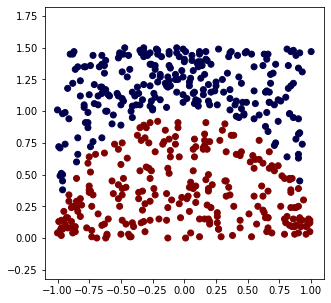

In [9]:
# Laden aller Daten in einen einzigen Array
Data = np.loadtxt('classification_data03.dat')

# Definieren einer Funktion, die aus dem Array aller Daten die Anteile x1, x2 und y herauszieht
# Die Klassenlabels werden direkt in Vorzeichen umgewandelt, da diese für die Berechnungen wichtiger sind
def data_to_structure(data):
    x1, x2, y = data.T
    z = (-1)**y
    return x1, x2, z

# Formatieren der Daten mit obiger Funktion
x1, x2, z = data_to_structure(Data)

### Auftragen der Daten ###
# Anlegen eines Plots
plt.figure(figsize = (5, 5))

# Auftragen der Daten 
plt.scatter(x1, x2, c = z, cmap = 'seismic')

# Zurechtmachen der Achsen
plt.axis('equal')

plt.show()

In der Vorlesung haben wir auch darüber geredet, dass wir einen Datensatz in einen Trainingsdatensatz, einen Validierungsdatensatz und einen Testdatensatz aufteilen können. Dies wollen wir am vorliegenden Datensatz ausprobieren. Dazu kann die Numpy-Funktion `np.random.shuffle()` verwendet werden, die einen Array zufällig durchmischt. Mit den Aufrufen `a[n:m]` werden alle Array-Elemente von `n` beginnend bis `m-1` aus dem Array entnommen. 

__Aufgabe__: Teile den Datensatz `Data` in einen Trainings- (70%), Validierungs- (20%) und Testdatensatz (10%) auf und formatiere jeden dieser Datensätze so, dass am Ende jeweils die Arrays `x1`, `x2` und `z` für jeden Datensatz vorliegen. Trage diese drei Datensätze nebeneinander auf.

#### Zerlegen und Formatieren der Daten

In [10]:
# Zufälliges durchmischen des Datensatzes
np.random.shuffle(Data)

# Zerlegen in drei Arrays mit 70 % der Daten, 20 % der Daten und 10 % der Daten.
Data_train = Data[:350]
Data_val = Data[350:450]
Data_test = Data[450:]

# Formatieren der Daten mit obiger Funktion
x1_train, x2_train, z_train = data_to_structure(Data_train)
x1_val, x2_val, z_val = data_to_structure(Data_val)
x1_test, x2_test, z_test = data_to_structure(Data_test)

#### Auftragen der Datensätze nebeneinander

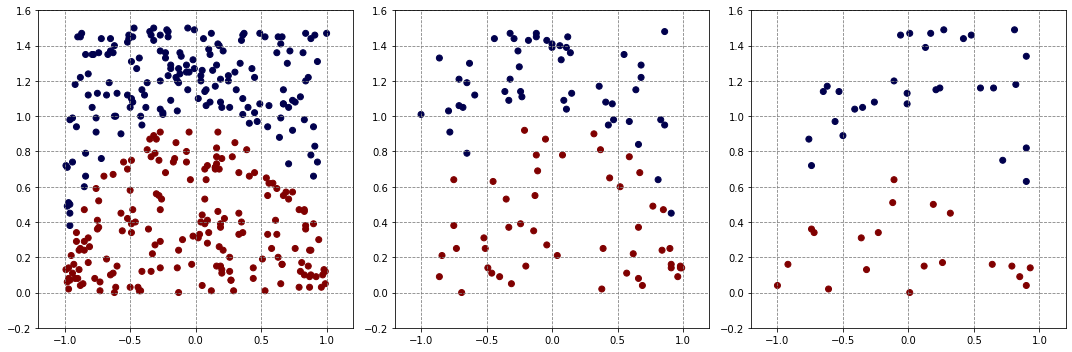

In [11]:
# Erstellen eines großen Plots
plt.figure(figsize = (15, 5))

# Auftragen des Trainingsdatensatzes 
plt.subplot(131)
plt.scatter(x1_train, x2_train, c = z_train, cmap = 'seismic')
plt.xlim(-1.2, 1.2)
plt.ylim(-.2, 1.6)
plt.grid(True, color = 'gray', linestyle = '--')

# Auftragen des Validierungsdatensatzes
plt.subplot(132)
plt.scatter(x1_val, x2_val, c = z_val, cmap = 'seismic')
plt.xlim(-1.2, 1.2)
plt.ylim(-.2, 1.6)
plt.grid(True, color = 'gray', linestyle = '--')

# Auftragen des Testdatensatzes
plt.subplot(133)
plt.scatter(x1_test, x2_test, c = z_test, cmap = 'seismic')
plt.xlim(-1.2, 1.2)
plt.ylim(-.2, 1.6)
plt.grid(True, color = 'gray', linestyle = '--')

plt.tight_layout()

plt.show()

Das nächst einfache Modell nach einer linearen Separation ist eines mit quadratischen Termen. Wir haben in der Vorlesung dafür die feature map
$$
\phi:\mathbb{R}^2\to \mathbb{R}^5,\begin{pmatrix}
    x_1\\x_2
\end{pmatrix}\mapsto\begin{pmatrix}
    x_1\\x_2\\x_1^2\\x_1x_2\\x_2^2
\end{pmatrix}
$$
eingeführt. 

__Aufgabe__: Lege die erweiterte Datenmatrix für den Trainings, Validierungs- und den Testdatensatz mit der feature map $\phi$ an. 

In [12]:
# Anzahl der Dimensionen des Zielraums der feature map
d = 5

# Erstellen der erweiterten Datenmatrix für den Trainingsdatensatz
N_train = len(z_train)
X_train = np.zeros(shape = (N_train, d+1))
for n in range(N_train):
    X_train[n] = np.array([1, x1_train[n], x2_train[n], x1_train[n]**2, x1_train[n]*x2_train[n], x2_train[n]**2])
    
# Erstellen der ertweiterten Datenmatrix für den Validierungsdatensatz
N_val = len(z_val)
X_val = np.zeros(shape = (N_val, d+1))
for n in range(N_val):
    X_val[n] = np.array([1, x1_val[n], x2_val[n], x1_val[n]**2, x1_val[n]*x2_val[n], x2_val[n]**2])
    
# Erstellen der ertweiterten Datenmatrix für den Testdatensatz
N_test = len(z_test)
X_test = np.zeros(shape = (N_test, d+1))
for n in range(N_test):
    X_test[n] = np.array([1, x1_test[n], x2_test[n], x1_test[n]**2, x1_test[n]*x2_test[n], x2_test[n]**2])

__Aufgabe__: Vervollständige das nachstehende Code-Gerüst, um einen Gradientenabstieg durchzuführen. Speichere dabei für jede Epoche die Gewichte, so wie den jeweiligen Trainings- und Validierungsfehler.

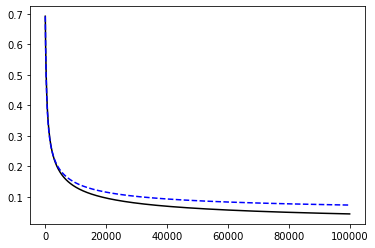

In [18]:
# Festlegen von Hyperparameters
learning_rate = 10**(-4)
epochen = 100000
al = 1    # Verschärfen der Sigmoidfunktion

# Initialisieren der Gewichte
w = np.zeros(d+1)

# Erstellen eines Arrays, in dem die Gewichte in jeder Epoche gespeichert werden
W = np.zeros(shape = (epochen, d+1))

# Erstelle Arrays in denen der Trainings und Validierungsfehler gespeichert werden
R_train, R_val = np.zeros(epochen), np.zeros(epochen)

# Gradientenabstieg
for n in range(epochen):
    # Erstellen eines leeren Gradientvektors
    grad_vec = np.zeros(d+1)
    
    # Bestimmen der einzelnen Komponenten des Gradientenvektors
    for j in range(d):
        grad_vec[j] = np.sum((al*z_train*X_train[:, j])/(1+np.exp(-al*z_train*(X_train@w))))
        
    # Updaten der Gewichte    
    w = w-learning_rate*grad_vec
    
    # Speichern der Gewichte dieser Epoche
    W[n] = w
    
    # Errechnen und Speichern des Trainings- und des Validierungsfehlers der Epoche
    R_train[n] = np.sum(np.log(1+np.exp(al*z_train*(X_train@w))))/N_train
    R_val[n] = np.sum(np.log(1+np.exp(al*z_val*(X_val@w))))/N_val
    
# Auftragen der Fehler 
plt.plot(R_train, 'k-')
plt.plot(R_val, 'b--')
plt.show()

__Aufgabe__: Bestimme durch die numpy-Funktion `np.argmin()` die Epoche mit dem geringsten Validierungsfehler. Wenn Dir die Zahl sinnvoll erscheint, setzte die Gewichte auf die Werte dieser Epoche und trage damit die Entscheidungskurve mit dem Trainings- und Validierungsdatensatz und separat mit dem Testdatensatz auf. Bestimme dann den Test-, sowie den Verallgemeinerungsfehler.

In [14]:
print(np.argmin(abs(R_val)))

99999


In [15]:
n_select = np.argmin(abs(R_val))
w = W[n_select]

#### Auftragen der Ergebnisse

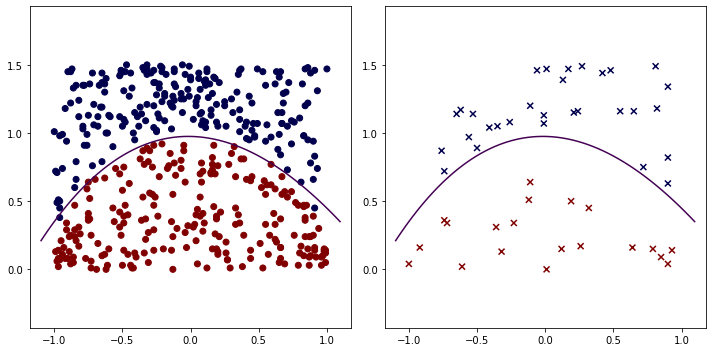

In [16]:
# Anlegen eines Plots
plt.figure(figsize = (10, 5))

# Auftragen der bisher betrachteten Datensätze und Ergebnisse
plt.subplot(121)

# Auftragen des Trainings und Validierungsdatensatzes 
plt.scatter(x1_train, x2_train, marker = 'o', c = z_train, cmap = 'seismic')
plt.scatter(x1_val, x2_val, marker = 'o', c = z_val, cmap = 'seismic')


# Erstellen eines Meshgrids für den Contour-Plot
X1, X2 = np.meshgrid(np.linspace(-1.1, 1.1, 100), np.linspace(0, 1.5, 100))

# Erstellen eines Contour-Plots mit erfüllen der Gleichung bei Contour == 0
plt.contour(X1, X2, w[0]+w[1]*X1+w[2]*X2+w[3]*X1**2+w[4]*X1*X2+w[5]*X2**2,  [0])

# Zurechtmachen der Achsen
plt.axis('equal')


# Auftragen des Testdatensatzes mit der Hypothese
plt.subplot(122)

# Auftragen des Testdatensatzes
plt.scatter(x1_test, x2_test, marker = 'x', c = z_test, cmap = 'seismic')

# Erstellen eines Contour-Plots mit erfüllen der Gleichung bei Contour == 0
plt.contour(X1, X2, w[0]+w[1]*X1+w[2]*X2+w[3]*X1**2+w[4]*X1*X2+w[5]*X2**2,  [0])

# Zurechtmachen der Achsen
plt.axis('equal')

plt.tight_layout()

plt.show()

#### Ermitteln des Testfehlers und des Verallgemeinerungsfehlers

In [20]:
# Bestimmen des Testfehlers
R_test = np.sum(np.log(1+np.exp(al*z_test*(X_test@w))))/N_test

# Bestimmen des Verallgemeinerungsfehlers
G = abs(R_test-R_train[n_select])

print(f'Der Trainingsfehler ist durch {R_train[n_select]:.4f} gegeben.\nDer Testfehler liegt bei {R_test:.4f} während der Verallgemeinerungsfehler {G:.4f} beträgt')

Der Trainingsfehler ist durch 0.0439 gegeben.
Der Testfehler liegt bei 0.0380 während der Verallgemeinerungsfehler 0.0059 beträgt
